### 1 - Import test data

In [10]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("XAUUSD_Candlestick_1_D_BID_03.06.1999-27.04.2024.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df=df[df.High!=df.Low]
df.reset_index(inplace=True, drop=True)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)

In [44]:
def rolling_max(df, column_name='High', window_size=10, new_column_name='RollingMax'):
    """
    Compute the rolling maximum of a specified column over a window of N rows and add it as a new column in the DataFrame.

    Parameters:
    - df: The DataFrame containing the data.
    - column_name: The name of the column to compute the rolling maximum for. Default is 'High'.
    - window_size: The size of the window over which to compute the rolling maximum. Default is 10.
    - new_column_name: The name of the new column to store the rolling maximum values. Default is 'RollingMax'.

    Returns:
    - The DataFrame with the new column added.
    """
    df[new_column_name] = df[column_name].shift(0).rolling(window=window_size).max()
    return df

def rolling_min(df, column_name='Low', window_size=10, new_column_name='RollingMin'):
    """
    Compute the rolling minimum of a specified column over a window of N rows and add it as a new column in the DataFrame.

    Parameters:
    - df: The DataFrame containing the data.
    - column_name: The name of the column to compute the rolling minimum for. Default is 'Low'.
    - window_size: The size of the window over which to compute the rolling minimum. Default is 10.
    - new_column_name: The name of the new column to store the rolling minimum values. Default is 'RollingMin'.

    Returns:
    - The DataFrame with the new column added.
    """
    df[new_column_name] = df[column_name].shift(0).rolling(window=window_size).min()
    return df

def rolling_avg(df, column1, column2, new_column_name='RollingAvg'):
    """
    Compute the rolling average of two specified columns over a window of N rows, and add it as a new column in the DataFrame.

    Parameters:
    - df: The DataFrame containing the data.
    - column1: The name of the first column to compute the rolling average for.
    - column2: The name of the second column to compute the rolling average for.
    - new_column_name: The name of the new column to store the rolling average values. Default is 'RollingAvg'.

    Returns:
    - The DataFrame with the new column added.
    """
   
    df[new_column_name] = (df[column1] + df[column2]) / 2.0
    
    return df

def scaled_price(df, close_column='Close', avg_column='RollingAvg', max_column='RollingMax', min_column='RollingMin', new_column_name='ScaledPrice'):
    """
    Calculate the Scaled Price for each row in the DataFrame.

    Parameters:
    - df: The DataFrame containing the data.
    - close_column: The name of the column containing the Close prices. Default is 'Close'.
    - avg_column: The name of the column containing the Rolling Average values. Default is 'RollingAvg'.
    - max_column: The name of the column containing the Rolling Maximum values. Default is 'RollingMax'.
    - min_column: The name of the column containing the Rolling Minimum values. Default is 'RollingMin'.
    - new_column_name: The name of the new column to store the Scaled Price values. Default is 'ScaledPrice'.

    Returns:
    - The DataFrame with the new column added.
    """
    # Calculate the Scaled Price
    df[new_column_name] = (df[close_column] - df[avg_column]) / (df[max_column] - df[min_column])
    
    return df

In [45]:
N=25
df = rolling_max(df, 'High', N, 'RollingMax')
df = rolling_min(df, 'Low', N, 'RollingMin')
df = rolling_avg(df, 'RollingMax', 'RollingMin')
df = scaled_price(df)

In [46]:
df.describe()

,Gmt time,Open,High,Low,Close,Volume,ATR,RollingMax,RollingMin,RollingAvg,ScaledPrice,TotalSignal,pointpos
count,7527,7527.000000,7527.000000,7527.000000,7527.000000,7.527000e+03,7520.000000,7503.000000,7503.000000,7503.000000,7503.000000,7527.000000,761.000000
mean,2012-03-06 16:29:04.758867968,1101.816046,1108.953357,1094.612993,1102.031026,2.429596e+08,14.385826,1141.466477,1061.383124,1101.424801,0.032587,0.161685,1110.270029
min,1999-06-03 00:00:00,252.250000,253.500000,252.200000,252.100000,1.128000e+04,1.336439,260.700000,252.200000,256.700000,-0.552632,0.000000,254.100100
25%,2006-03-13 12:00:00,561.646000,567.749000,556.604500,562.275500,1.057206e+07,7.640666,591.234000,538.739500,562.373500,-0.239143,0.000000,625.567900
50%,2012-03-19 00:00:00,1215.716000,1223.398000,1208.898000,1216.022000,3.167875e+07,13.582062,1254.303000,1180.548000,1216.761500,0.043161,0.000000,1221.780900
75%,2018-04-08 12:00:00,1546.211500,1556.904000,1534.878500,1546.267500,6.923920e+07,19.315291,1607.936500,1478.038000,1538.162500,0.316841,0.000000,1515.524900
max,2024-04-26 00:00:00,2387.635000,2431.385000,2381.275000,2390.295000,1.301699e+10,66.341724,2431.385000,2187.225000,2309.305000,0.500000,2.000000,2325.654900
std,NaN,549.356558,552.381404,545.995631,549.415510,5.957545e+08,8.756683,564.248192,528.401466,545.948484,0.300729,0.506696,532.718470


In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

st = 300
dfsample = df[st:st+300]

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add candlestick plot with customized line colors
fig.add_trace(go.Candlestick(x=dfsample.index,
                             open=dfsample['Open'],
                             high=dfsample['High'],
                             low=dfsample['Low'],
                             close=dfsample['Close'],
                             increasing=dict(line=dict(color='rgba(0, 255, 0, 0.6)', width=0.1), # Red with transparency for increasing
                                             fillcolor='rgba(0, 255, 0, 0.6)'), # Match fill color with line color
                             decreasing=dict(line=dict(color='rgba(255, 0, 0, 0.6)', width=0.1), # Green with transparency for decreasing
                                             fillcolor='rgba(255, 0, 0, 0.6)')), # Match fill color with line color
              row=1, col=1)

# Add rolling max
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['RollingMax'],
                         line=dict(color='red', width=2),
                         name="Rolling Max"),
              row=1, col=1)

# Add rolling min
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['RollingMin'],
                         line=dict(color='blue', width=2),
                         name="Rolling Min"),
              row=1, col=1)

# Add rolling average
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['RollingAvg'],
                         line=dict(color='yellow', width=2),
                         name="Rolling Average"),
              row=1, col=1)

# Add ScaledPrice curve to the second row
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['ScaledPrice'],
                         line=dict(color='purple', width=2),
                         name="Scaled Price"),
              row=2, col=1)

# Update layout to set background color to black and remove gridlines
fig.update_layout(
    width=1000,
    height=600,
    sliders=[],
    paper_bgcolor='black',  # Set the background color of the entire figure
    plot_bgcolor='black',   # Set the background color of the plotting area
    xaxis_showgrid=False,   # Remove x-axis gridlines
    yaxis_showgrid=False,   # Remove y-axis gridlines
    xaxis_rangeslider=dict(visible=False),
)
# Show the plot
fig.show()

In [64]:
def generate_signal(df, threshold1=0.5, threshold2=-0.5, new_column_name='TotalSignal'):
    """
    Generate a signal based on the specified conditions and save all signals as a new column in the DataFrame.

    Parameters:
    - df: The DataFrame containing the data.
    - threshold1: The first threshold for the condition. Default is 0.5.
    - threshold2: The second threshold for the condition. Default is 0.5.
    - new_column_name: The name of the new column to store the signal values. Default is 'TotalSignal'.

    Returns:
    - The DataFrame with the new column added.
    """
    # Initialize the new column with default value 0 (no signal)
    df[new_column_name] = 0

    # Iterate through the DataFrame, starting from the second row
    for i in range(1, len(df)):
        # Check if the previous row ScaledPrice was below threshold1 and the current row is above threshold2
        if df.loc[i-1, 'ScaledPrice'] < threshold1 and df.loc[i, 'ScaledPrice'] > threshold1:
            df.loc[i, new_column_name] = 2
        # Check if the previous row ScaledPrice was above threshold1 and the current row is below -threshold2
        elif df.loc[i-1, 'ScaledPrice'] > threshold2 and df.loc[i, 'ScaledPrice'] < threshold2:
            df.loc[i, new_column_name] = 1

    return df

df = generate_signal(df)

In [65]:
df.TotalSignal.value_counts()

TotalSignal
0    7514
1      11
2       2
Name: count, dtype: int64

In [66]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [67]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=0
dfpl = df[st:st+350]
# Create a plot with 2 rows
fig = make_subplots(rows=1, cols=1)

# Add candlestick plot on the first row
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                         marker=dict(size=8, color="MediumPurple"),
                         name="entry"),
              row=1, col=1)

fig.update_layout(width=1200, height=800, sliders=[])
fig.show()

In [59]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[0:]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.1
    TPSLRatio = 1.5
    ordertime=[]

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        TPSLRatio = self.TPSLRatio
       
        # if len(self.trades)>0:
        #     if self.data.index[-1]-self.trades[-1].entry_time>=5:
        #         self.trades[-1].close()
        
        if self.signal1==1 and len(self.trades)==0:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)

            limit=self.data.High[-1]+self.data.High[-1]*0.01
            sl1 = limit + 0.02*self.data.High[-1]
            tp1 = limit - (sl1-limit)*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize, limit=limit)
            self.ordertime.append(self.data.index[-1])

        elif self.signal1==2 and len(self.trades)==0:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            limit=self.data.Low[-1]-self.data.Low[-1]*0.01         
            sl1 = limit - 0.02*self.data.Low[-1]
            tp1 = limit + (self.data.Close[-1]-sl1)*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize, limit=limit)
            self.ordertime.append(self.data.index[-1])

bt = Backtest(dfopt, MyStrat, cash=25000, margin=1/30, commission=0.0002)
stats, heatmap = bt.optimize(TPSLRatio=[i/10 for i in range(10, 26)],
                        maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5124\4078794966.py:48: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

f:\Python\Lib\site-packages\backtesting\backtesting.py:912: UserWarning:

(208) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119

f:\Python\Lib\site-packages\backtesting\backtesting.py:912: UserWarning:

(6376) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) s

Start                                     0.0
End                                    7526.0
Duration                               7526.0
Exposure Time [%]                    1.766972
Equity Final [$]                 33839.891148
Equity Peak [$]                  36024.706284
Return [%]                          35.359565
Buy & Hold Return [%]              779.655627
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -13.203576
Avg. Drawdown [%]                   -3.752215
Max. Drawdown Duration                 3068.0
Avg. Drawdown Duration                 277.75
# Trades                                  9.0
Win Rate [%]                        66.666667
Best Trade [%]                       4.271941
Worst Trade [%]                     -2.039794
Avg. Trade [%]                    

In [68]:
heatmap

TPSLRatio
1.0          21.130429
1.1          25.708723
1.2          30.471770
1.3          35.359565
1.4          12.371830
1.5          15.293202
1.6          18.253702
1.7          21.259263
1.8           5.438465
1.9           7.603512
2.0           9.561337
2.1          11.839152
2.2          13.817206
2.3          15.969643
2.4          17.901824
2.5          20.228517
Name: Return [%], dtype: float64

In [69]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[0:]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.1
    slcoef = 1.1
    TPSLRatio = 1.5
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=25000, margin=1/30, commission=0.0002)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 21)],
                    TPSLRatio=[i/10 for i in range(10, 21)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5124\321443345.py:32: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    7526.0
Duration                               7526.0
Exposure Time [%]                    0.411851
Equity Final [$]                 27650.288831
Equity Peak [$]                  27650.288831
Return [%]                          10.601155
Buy & Hold Return [%]              779.655627
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -6.073204
Avg. Drawdown [%]                   -4.333565
Max. Drawdown Duration                 3253.0
Avg. Drawdown Duration            1142.666667
# Trades                                 12.0
Win Rate [%]                        58.333333
Best Trade [%]                       1.645545
Worst Trade [%]                     -1.088678
Avg. Trade [%]                    

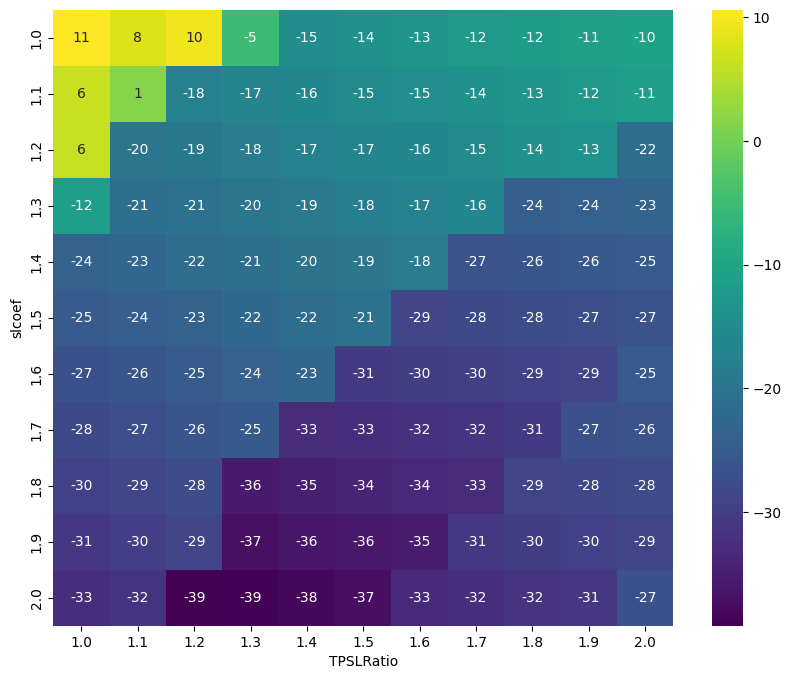

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [128]:
bt.plot()

f:\Python\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

f:\Python\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p2627', ...)

In [61]:
heatmap

TPSLRatio
1.0          21.130429
1.1          25.708723
1.2          30.471770
1.3          35.359565
1.4          12.371830
1.5          15.293202
1.6          18.253702
1.7          21.259263
1.8           5.438465
1.9           7.603512
2.0           9.561337
2.1          11.839152
2.2          13.817206
2.3          15.969643
2.4          17.901824
2.5          20.228517
Name: Return [%], dtype: float64